# Convolutional Neural Net (CNN)

Based on **Patric Loeber** video: https://www.youtube.com/watch?v=c36lUUr864M&t=11658s

Convolutional neural nets or conf nets are similar to ordinary neural networks. They are made up of neurons that have learnable weights and biases. The main difference now is that convolutional nets mainly works on image data and apply the so-called convolutional filters.

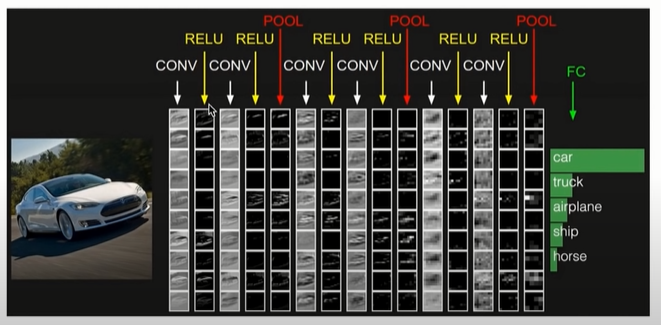

A typical onvolutional architecture looks like one above. We have aour image and then we have different convolutional layers and optional activation functions followed by so-called pooling layers. Layers are used to automatically learn some features from the images and then at the end we have a one or more fully connected layers for the actual classification task.

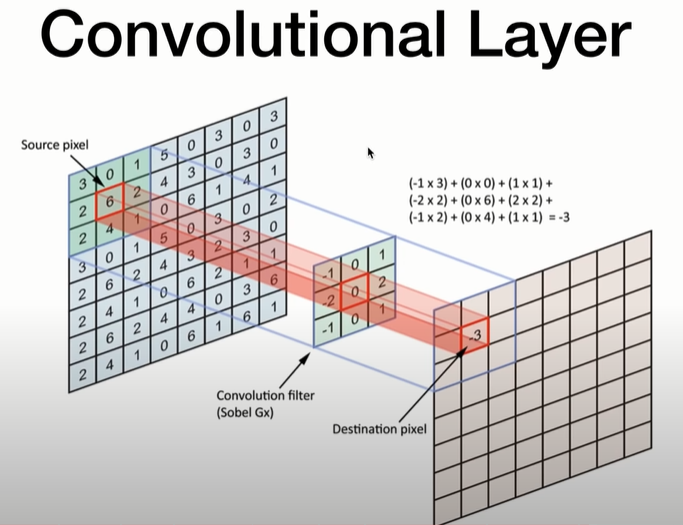

The convolutional filters work by applying a filter kernel to our image.

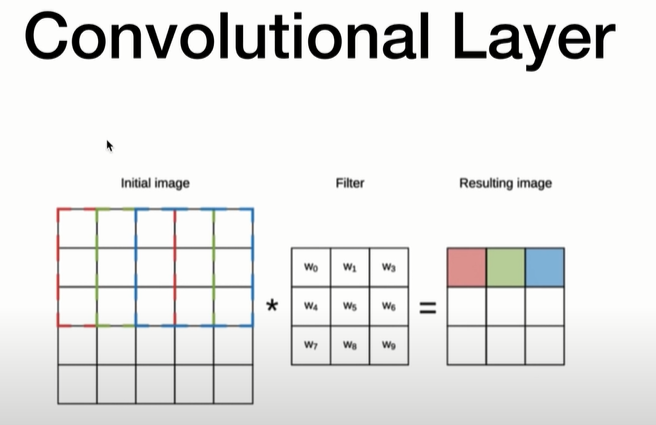

We put the filter at the first position in our image. We put the filter at the red positon and then we compute the output value by multiplying and summing up all the values. Then we write the value into the output image at the red position. After that we slide our filter to the next position (green) and then we do the same thing and same filter operation and then we slide our filter over the whole image until we are done. So this is how convolutional filters work.

With this transform our resulting image may have a smaller size because our filter does not fit in the corners except if we use a technique that is called padding.

Getting the correct size is an important step.

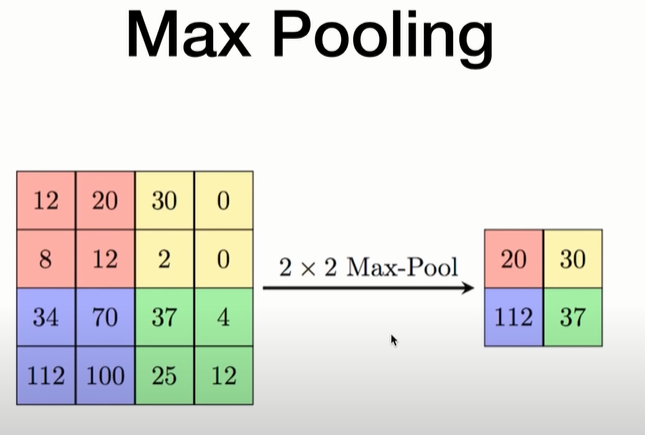

Pooling layers are more specific in this case the max pooling. Max pooling is used to down sample an image by applying a maximum filter to subregions. Here we have a filter of size two by two. Then we look at the two by two subregions in our original image and we write the maximum value of this region into the output image. Max pooling is used to reduce the computational cost by reducing the size of the image. This reduces the number of parameters that our model has to learn. It also helps to avoid overfitting by providing an abstracted form of the input.

## CNN test code

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# Hyper-parameters
num_epochs = 0
batch_size = 4
learning_rate = 0.001

In [5]:
# dataset has PILImage images of range [0, 1]
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# before implementing ssl, SSL: CERTIFICATE_VERIFY_FAILED occured
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                             download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                           shuffle=False)

100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [6]:
classes = ('plane','car','bird','cat',
           'deer','dog','frog','horse','ship','truck')

In [7]:
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

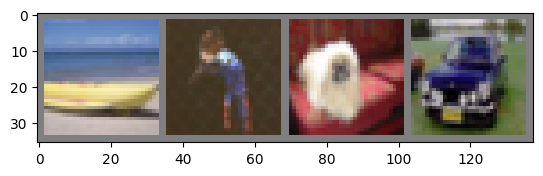

In [8]:
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

In [9]:
# same layers like in code belowe
conv1 = nn.Conv2d(3, 6, 5)
pool = nn.MaxPool2d(2, 2)
conv2 = nn.Conv2d(6, 16, 5)
print(F"images shape: {images.shape}")
print("image numbers: 4 - batch size, 3 - color channels, image size 32x32")
x = conv1(images)
print(f"conv1 shape: {x.shape}")
print("conv1 numbers: 4 - batch size, 6 - output channels, image size 28x28")
x = pool(x)
print(f"pool1 shape: {x.shape}")
print("pool1 numbers: 4 - batch size, 6 - output channels, image size 14x14")
x = conv2(x)
print(f"conv2 shape: {x.shape}")
print("conv2 numbers: 4 - batch size, 16 - output channels, image size 10x10")
x = pool(x)
print(f"pool2 shape: {x.shape}")
print("pool2 numbers: 4 - batch size, 16 - output channels, image size 5x5")

images shape: torch.Size([4, 3, 32, 32])
image numbers: 4 - batch size, 3 - color channels, image size 32x32
conv1 shape: torch.Size([4, 6, 28, 28])
conv1 numbers: 4 - batch size, 6 - output channels, image size 28x28
pool1 shape: torch.Size([4, 6, 14, 14])
pool1 numbers: 4 - batch size, 6 - output channels, image size 14x14
conv2 shape: torch.Size([4, 16, 10, 10])
conv2 numbers: 4 - batch size, 16 - output channels, image size 10x10
pool2 shape: torch.Size([4, 16, 5, 5])
pool2 numbers: 4 - batch size, 16 - output channels, image size 5x5


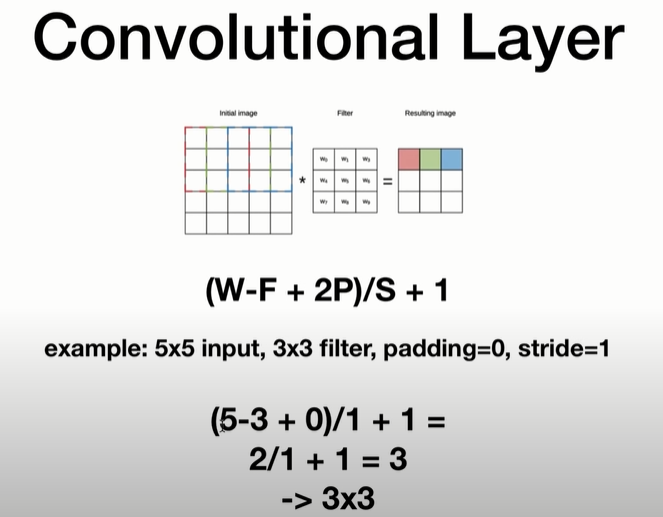

## Code

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [12]:
# Hyper-parameters
num_epochs = 4
batch_size = 4
learning_rate = 0.001

In [13]:
# dataset has PILImage images of range [0, 1]
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# before implementing ssl, SSL: CERTIFICATE_VERIFY_FAILED occured
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                             download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                           shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [14]:
classes = ('plane','car','bird','cat',
           'deer','dog','frog','horse','ship','truck')

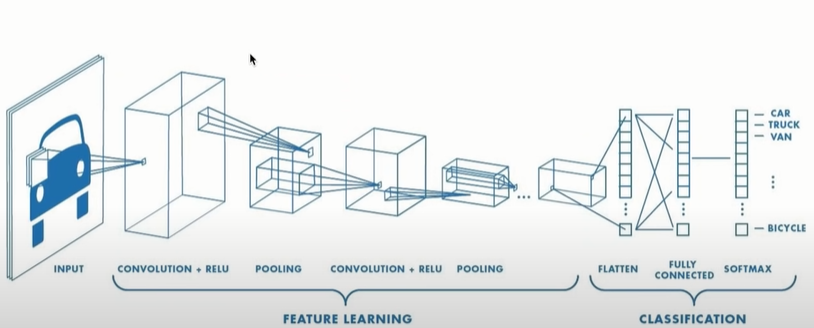

We have CNN architecture above. First we have a convolutional layer and then followed by a ReLU activation function then we apply max pooling. After that we have a second convolutional layer with a ReLU function and a max pooling. Then we have three different fully connected layers and then at the very end we have the softmax and the cross entropy. The softmax is already included in the Cross Entropy Loss.

In [15]:
# implement conv net
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # input channel size = 3 because our images have three color channels
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        # input channel size must be equal to the last output channel size
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # activation function does not change size
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [16]:
model = ConvNet().to(device)

# in multi-class classification problem we use CrossEntropyLoss 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] - 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2000 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}")
print('Finished Training')

Epoch [1/4], Step [2000/12500], Loss: 2.3033
Epoch [1/4], Step [4000/12500], Loss: 2.3181
Epoch [1/4], Step [6000/12500], Loss: 2.3099
Epoch [1/4], Step [8000/12500], Loss: 2.2848
Epoch [1/4], Step [10000/12500], Loss: 2.2399
Epoch [1/4], Step [12000/12500], Loss: 2.4913
Epoch [2/4], Step [2000/12500], Loss: 1.9252
Epoch [2/4], Step [4000/12500], Loss: 1.6548
Epoch [2/4], Step [6000/12500], Loss: 1.9405
Epoch [2/4], Step [8000/12500], Loss: 2.0064
Epoch [2/4], Step [10000/12500], Loss: 1.4963
Epoch [2/4], Step [12000/12500], Loss: 1.9599
Epoch [3/4], Step [2000/12500], Loss: 1.3928
Epoch [3/4], Step [4000/12500], Loss: 1.2147
Epoch [3/4], Step [6000/12500], Loss: 2.2280
Epoch [3/4], Step [8000/12500], Loss: 1.6355
Epoch [3/4], Step [10000/12500], Loss: 1.0708
Epoch [3/4], Step [12000/12500], Loss: 1.0788
Epoch [4/4], Step [2000/12500], Loss: 2.6029
Epoch [4/4], Step [4000/12500], Loss: 1.2619
Epoch [4/4], Step [6000/12500], Loss: 1.2569
Epoch [4/4], Step [8000/12500], Loss: 0.7511
Epoc

In [17]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # max returns (value, index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range (batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1
    acc = 100.0 * n_correct / n_samples
    print(f"Accuracy of th network: {acc} %")
    
    for i in range(10):
        acc_i = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f"Accuracy of {classes[i]}: {acc_i} %")

Accuracy of th network: 46.46 %
Accuracy of plane: 48.0 %
Accuracy of car: 63.6 %
Accuracy of bird: 16.8 %
Accuracy of cat: 46.3 %
Accuracy of deer: 39.7 %
Accuracy of dog: 30.5 %
Accuracy of frog: 67.9 %
Accuracy of horse: 52.1 %
Accuracy of ship: 56.5 %
Accuracy of truck: 43.2 %


Our accuracy is not good because we specified only 4 epochs.